In [115]:
import pandas as pd
import numpy as np
import regex as re
import nltk
from nltk.draw.dispersion import dispersion_plot
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.util import ngrams

import matplotlib.pyplot as plt

import os

# Any results you write to the current directory are saved as output.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
print("The current directory is: ", os.getcwd())
import os
os.chdir("/content/gdrive/My Drive/Galvanize Adm/Marcel Proust")
print("The current directory is: ", os.getcwd())

The current directory is:  /content/gdrive/My Drive/Galvanize Adm/Marcel Proust
The current directory is:  /content/gdrive/My Drive/Galvanize Adm/Marcel Proust


In [19]:
txt = open('SwannsWay.txt').read()
print(txt[:500])
txt = txt[:2000].replace('\n', '')



For a long time I used to go to bed early. Sometimes, when I had put out
my candle, my eyes would close so quickly that I had not even time to
say "I'm going to sleep." And half an hour later the thought that it was
time to go to sleep would awaken me; I would try to put away the book
which, I imagined, was still in my hands, and to blow out the light; I
had been thinking all the time, while I was asleep, of what I had just
been reading, but my thoughts had run into a channel of their own,
unt


In [0]:
# creating characters, words and lists 
characters = sorted(list(set(txt)))
words = txt.split(' ')
sentences = txt.split('.')

In [0]:
n_to_char = {n:char for n, char in enumerate(characters)}

In [0]:
# let's remove stop words from words
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words_s = [i for i in words if not i in stop_words]
words_s = [word.lower() for word in words_s if word.isalpha()]

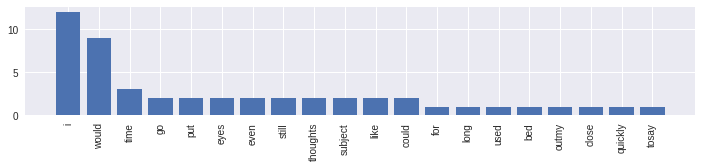

In [60]:
fdist = FreqDist(words_s) # checking most frequent words in whole document
plt.figure(figsize= (12,2))
plt.bar(pd.DataFrame(fdist.most_common()[0:20])[0], pd.DataFrame(fdist.most_common()[0:20])[1])
plt.xticks(rotation=90)
plt.show()

In [0]:
# lemmatizing
#nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
words_s_l = pd.Series(words_s).apply(lambda x: lemmatizer.lemmatize(x))

In [0]:
#nltk.download('averaged_perceptron_tagger')
words_s_l_p = pd.DataFrame(nltk.pos_tag(words_s_l), columns = ['words', 'pos'])

In [0]:
def trigram(x):
  tokens = [token for token in x.split(" ") if token != ""]
  output = list(ngrams(tokens, 3))
  return output

In [127]:
(pd.Series(sentences).apply(lambda x: trigram(x)))

0    [(For, a, long), (a, long, time), (long, time,...
1    [(Sometimes,, when, I), (when, I, had), (I, ha...
2    [(", And, half), (And, half, an), (half, an, h...
3    [(Thisimpression, would, persist), (would, per...
4    [(Thenit, would, begin), (would, begin, to), (...
5    [(I, would, ask), (would, ask, myself), (ask, ...
dtype: object